In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/paula/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# Load data
talents = pd.read_csv('potential-talents - Aspiring human resources - seeking human resources.csv')
talents

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN
...,...,...,...,...,...
99,100,Aspiring Human Resources Manager | Graduating ...,"Cape Girardeau, Missouri",103,NaN
100,101,Human Resources Generalist at Loparex,"Raleigh-Durham, North Carolina Area",500+,NaN
101,102,Business Intelligence and Analytics at Travelers,Greater New York City Area,49,NaN
102,103,Always set them up for Success,Greater Los Angeles Area,500+,NaN


# Prepare data for finding similarity metrics

In [63]:
# Import libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

## Vectorizing Columns for similarities

looks at text similarity <br>
1 - Bin connections <br>
2 - Sentence transformer, it will create a model <br>
3 - Fuzzy similarity. fuzzywuzzy. <br>
4-  Function that returns the similarity score <br>
5 - Two complexities: Text Embedding, converting & 

Snippet

from sentence_transformers import SentenceTransformer, util

sent_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

from fuzzywuzzy import fuzz
def sentence_similarity(title, target_title, model):
        sentences = [title, target_title]

        

        #Compute embedding for both lists
        embedding_1= model.encode(sentences[0], convert_to_tensor=True)
        embedding_2 = model.encode(sentences[1], convert_to_tensor=True)

        similarity_score = util.pytorch_cos_sim(embedding_1, embedding_2)
        
        return similarity_score.numpy()[0][0]
        
https://www.sbert.net/


In [7]:
# Merge all columns in one of the dataframe
talents['text_for_vectorizing'] = talents.job_title+ " " +talents.location + " " + talents.connection
talents

,id,job_title,location,connection,fit,text_for_vectorizing
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN,2019 C.T. Bauer College of Business Graduate (...
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN,Native English Teacher at EPIK (English Progra...
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,Aspiring Human Resources Professional Raleigh-...
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,"People Development Coordinator at Ryan Denton,..."
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN,Advisory Board Member at Celal Bayar Universit...
...,...,...,...,...,...,...
99,100,Aspiring Human Resources Manager | Graduating ...,"Cape Girardeau, Missouri",103,NaN,Aspiring Human Resources Manager | Graduating ...
100,101,Human Resources Generalist at Loparex,"Raleigh-Durham, North Carolina Area",500+,NaN,Human Resources Generalist at Loparex Raleigh-...
101,102,Business Intelligence and Analytics at Travelers,Greater New York City Area,49,NaN,Business Intelligence and Analytics at Travele...
102,103,Always set them up for Success,Greater Los Angeles Area,500+,NaN,Always set them up for Success Greater Los Ang...


In [8]:
# Will set up both count vectorizer and tfidf to compare afterwards metrics on both approaches
tfidf_vect = TfidfVectorizer(stop_words={'en'})
talents_tfidf_vect = tfidf_vect.fit_transform(talents.text_for_vectorizing)


In [9]:
#Save it in a dataframe
talents_tfidf_df= pd.DataFrame(talents_tfidf_vect.todense(),columns=tfidf_vect.get_feature_names())
talents_tfidf_df

,103,155,16,174,18,19,2019,2020,212,2621,...,western,westfield,with,within,woodlands,work,world,worth,york,zmir
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.287908,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.353651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.262021,0.0,0.0,0.0,0.0,0.0,0.000000,0.262021,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
100,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
101,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.269716,0.000000
102,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [160]:
#With Countvectorizer
count_vect = CountVectorizer(stop_words={'en'})
talents_count_vect = count_vect.fit_transform(talents.text_for_vectorizing)
talents_count_df= pd.DataFrame(talents_count_vect.todense(),columns=count_vect.get_feature_names())
talents_count_df

,103,155,16,174,18,19,2019,2020,212,2621,...,western,westfield,with,within,woodlands,work,world,worth,york,zmir
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Preprocessing data


In [8]:
# Bin connections
talents.connection.replace('500+ ','500',inplace=True)
talents.astype({'connection': 'int32'})
talents.head()

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500,NaN


In [18]:
talents.connection.unique()


array(['85', '500', '44', '1', '61', '2', '390', '57', '82', '5', '7',
       '16', '212', '409', '52', '455', '174', '268', '50', '4', '40',
       '18', '349', '155', '39', '64', '9', '415', '19', '71', '48',
       '103', '49'], dtype=object)

In [31]:
bins = [0, 50, 100, 200, 300, 400, 500]
labels = [1,2,3,4,5,6]
talents['binned_connections'] = pd.cut(talents['connection'].astype(int), bins=bins, labels=labels)
talents.head()

,id,job_title,location,connection,fit,binned_connections
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN,2
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500,NaN,6
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,1
3,4,People Development Coordinator at Ryan,"Denton, Texas",500,NaN,6
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500,NaN,6


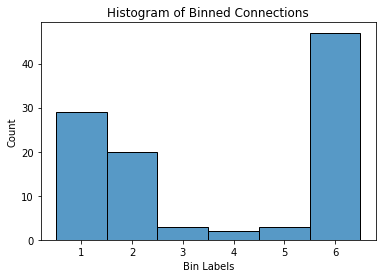

In [38]:
# Histogram of bins
sns.histplot(talents['binned_connections'])
plt.xlabel('Bin Labels')
plt.ylabel('Count')
plt.title('Histogram of Binned Connections')
plt.show()

In [39]:
# Using sentence transformers
from sentence_transformers import SentenceTransformer, util

sent_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [40]:
# Declare key words
key_words_1 = 'Aspiring human resources'
key_words_2 = 'seeking human resources'

In [41]:
# Transforming key words
key_transformed_1 = sent_model.encode(key_words_1, convert_to_tensor=True)
key_transformed_2 = sent_model.encode(key_words_2, convert_to_tensor=True)

In [47]:
# Remove punctuation
talents['job_title']=talents.job_title.str.replace('[^\w\s]','')
talents['location']=talents.location.str.replace('[^\w\s]','')
talents.head()

<ipython-input-47-24cb35c2c4cc>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  talents['job_title']=talents.job_title.str.replace('[^\w\s]','')
<ipython-input-47-24cb35c2c4cc>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  talents['location']=talents.location.str.replace('[^\w\s]','')


,id,job_title,location,connection,fit,binned_connections
0,1,2019 CT Bauer College of Business Graduate Mag...,Houston Texas,85,NaN,2
1,2,Native English Teacher at EPIK English Program...,Kanada,500,NaN,6
2,3,Aspiring Human Resources Professional,RaleighDurham North Carolina Area,44,NaN,1
3,4,People Development Coordinator at Ryan,Denton Texas,500,NaN,6
4,5,Advisory Board Member at Celal Bayar University,İzmir Türkiye,500,NaN,6


In [48]:
# Lower case all words
talents['job_title']=talents.job_title.str.lower()
talents['location']=talents.location.str.lower()
talents.head()

,id,job_title,location,connection,fit,binned_connections
0,1,2019 ct bauer college of business graduate mag...,houston texas,85,NaN,2
1,2,native english teacher at epik english program...,kanada,500,NaN,6
2,3,aspiring human resources professional,raleighdurham north carolina area,44,NaN,1
3,4,people development coordinator at ryan,denton texas,500,NaN,6
4,5,advisory board member at celal bayar university,i̇zmir türkiye,500,NaN,6


In [73]:
# Removing stop words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.parsing.preprocessing import remove_stopwords

def remove_sw(row):
    stop_words = set(stopwords.words('english'))
  
    word_tokens = word_tokenize(row)
  
    return ' '.join([w for w in word_tokens if not w.lower() in stop_words])

talents['job_title'] =talents.job_title.apply(remove_sw)
talents.head()

,id,job_title,location,connection,fit,binned_connections
0,1,2019 ct bauer college business graduate magna ...,houston texas,85,NaN,2
1,2,native english teacher epik english program korea,kanada,500,NaN,6
2,3,aspiring human resources professional,raleighdurham north carolina area,44,NaN,1
3,4,people development coordinator ryan,denton texas,500,NaN,6
4,5,advisory board member celal bayar university,i̇zmir türkiye,500,NaN,6


In [74]:
talents['text_for_vectorizing'] = talents.job_title+ " " +talents.location + " " + talents.connection
talents.head()

,id,job_title,location,connection,fit,binned_connections,text_for_vectorizing
0,1,2019 ct bauer college business graduate magna ...,houston texas,85,NaN,2,2019 ct bauer college business graduate magna ...
1,2,native english teacher epik english program korea,kanada,500,NaN,6,native english teacher epik english program ko...
2,3,aspiring human resources professional,raleighdurham north carolina area,44,NaN,1,aspiring human resources professional raleighd...
3,4,people development coordinator ryan,denton texas,500,NaN,6,people development coordinator ryan denton tex...
4,5,advisory board member celal bayar university,i̇zmir türkiye,500,NaN,6,advisory board member celal bayar university i...


# Similarity metrics

## Using Fuzzy Library

In [79]:
from fuzzywuzzy import fuzz, process

In [96]:
# Test similar row to check score
round(fuzz.token_sort_ratio(key_words_1,talents.job_title.iloc[2])/100,3)

0.79

In [98]:
# Create function for fuzzy similarity
def sentence_fuzzy_similarity(title, target_title):
        return round(fuzz.token_sort_ratio(title,target_title)/100,3)

In [ ]:
talents['cosine_key_1'] = round(talents.job_title.apply(sentence_fuzzy_similarity, args=(key_words_1)),3)
talents['cosine_key_2'] = round(talents.job_title.apply(sentence_cos_similarity, args=(key_words_2)),3)
talents.head()

## Using Cosine Similarity

In [90]:
def sentence_cos_similarity(title, target_title, model):
        sentences = [title, target_title]

        #Compute embedding for both lists
        embedding_1= model.encode(sentences[0], convert_to_tensor=True)
        embedding_2 = model.encode(sentences[1], convert_to_tensor=True)

        similarity_score = util.pytorch_cos_sim(embedding_1, embedding_2)
        
        return similarity_score.numpy()[0][0]

In [78]:
sentence_cos_similarity(key_words_1,talents.job_title.iloc[0],sent_model)

0.94980717

In [92]:
# Applying to both key words
talents['cosine_key_1'] = round(talents.job_title.apply(sentence_cos_similarity, args=(key_words_1,sent_model)),3)
talents['cosine_key_2'] = round(talents.job_title.apply(sentence_cos_similarity, args=(key_words_2,sent_model)),3)
talents.head()

,id,job_title,location,connection,fit,binned_connections,text_for_vectorizing,cosine_key_1,cosine_key_2
0,1,2019 ct bauer college business graduate magna ...,houston texas,85,NaN,2,2019 ct bauer college business graduate magna ...,0.567,0.436
1,2,native english teacher epik english program korea,kanada,500,NaN,6,native english teacher epik english program ko...,0.142,0.139
2,3,aspiring human resources professional,raleighdurham north carolina area,44,NaN,1,aspiring human resources professional raleighd...,0.950,0.773
3,4,people development coordinator ryan,denton texas,500,NaN,6,people development coordinator ryan denton tex...,0.378,0.360
4,5,advisory board member celal bayar university,i̇zmir türkiye,500,NaN,6,advisory board member celal bayar university i...,0.202,0.202
